# Homework 3 - 2D Cellular Automata

Upload the completed notebook with *firstname_lastname-HW3*.

Remember: code needs to be implemented in your own words. No copy-pasting. 

## Excercise 1 

Build an `update` function that takes a numpy array of 0s and 1s and implements the game of life rules on it using wrap-around boundary conditions. 


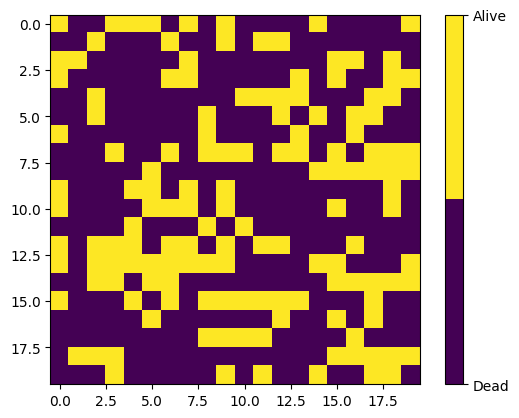

In [3]:
import matplotlib.pyplot as plt
import numpy as np

GoL_universe = np.random.randint(0, 2, size = (20, 20))

def update(universe):

     rows = np.shape(universe)[0]
     cols = np.shape(universe)[1]

     new_universe = np.zeros(universe.shape)
    
     for i, j in np.ndindex(universe.shape):

          W  = universe[i,(j-1)%rows]
          E  = universe[i,(j+1)%rows]
          N  = universe[(i-1)%cols,j]
          S  = universe[(i+1)%cols,j]
          NW = universe[(i-1)%cols,(j-1)%rows]
          NE = universe[(i-1)%cols,(j+1)%rows]
          SW = universe[(i+1)%cols,(j-1)%rows]
          SE = universe[(i+1)%cols,(j+1)%rows]

          neighborhood = W + E + N + S + NW + NE + SW + SE

          # if cell is alive
          if universe[i,j] == 1:

               # underpopulation and overpopulation      
               if (neighborhood < 2) or (neighborhood > 3):
                    new_universe[i,j] = 0

               # stasis
               else:
                    new_universe[i,j] = 1

          # if cell is dead       
          else:

               # regeneration
               if neighborhood == 3:
                    new_universe[i,j] = 1

               # dead cell alone stays dead
               else:
                    new_universe[i,j] = 0
                    
     return new_universe

cmap = plt.cm.get_cmap('viridis', 2) 
plt.imshow(update(GoL_universe), cmap = cmap)
cbar = plt.colorbar(ticks=[0, 1])
cbar.ax.set_yticklabels(['Dead', 'Alive'])
plt.show()



## Excercise 2
Use the `plant_seed` function provided to place the follow a glider (also provided) on a 20x20 grid. Animate the glider forward in time 100 generations.  

In [ ]:
from IPython.display import clear_output
from time import sleep

def ceil(a, b):
    return -(-a // b)

def plant_seed(seed, nrow, ncol):

    soil = np.zeros((nrow, ncol))
    
    rowu = soil.shape[0] // 2 + seed.shape[0] // 2
    rowl = ceil(soil.shape[0], 2) - ceil(seed.shape[0], 2)
    colu = soil.shape[1] // 2 + seed.shape[1] // 2
    coll = ceil(soil.shape[1], 2) - ceil(seed.shape[1], 2)
    
    soil[rowl:rowu, coll:colu] = seed
    
    planted_seed = soil
    return planted_seed

glider = np.array([ [0,1,0],
                    [0,0,1],
                    [1,1,1] ])

universe = plant_seed(glider, 20, 20)

n = 100

for i in range(n):
    plt.imshow(update(universe), cmap = 'viridis')
    plt.show()
    
    sleep(.5)
    
    universe = update(universe)
    
    clear_output(wait = True)



## Excercise 3

Bacterial populations have been shown to compete in a real-life rock paper scissors game that results in complex dynamics. 

If you want to learn more about this see *Benjamin Kerr, Margaret A. Riley, Marcus W. Feldman & Brendan J. M. Bohannan. Local dispersal promotes biodiversity in a real-life game of rock-paper-scissors*

Simulate these competing bacterial populations using a 3 state, 2D CA where the states are 0, 1, and 2. Use the rock-paper-scissors rule where 1 beats 0, 2 beats 1, and 0 beats 2. 

Make the rule set such that each cell plays against all cells in its neighborhood and adopts the state of any cell that beats it. 

Use the Moore neighborhood (https://en.wikipedia.org/wiki/Moore_neighborhood) and wraparound boundary conditions. 

Simulate both random initial conditions and sectored initial conditions, meaning 3 quadrants of 0,1,2.





In [ ]:
# scissors = 0, rock = 1, paper = 2

rps_universe = np.zeros((20,20))
rps_universe = np.random.randint(0, 3, size = (20,20))

def update(universe):

     rows, cols = universe.shape

     new_universe = np.zeros(universe.shape)
    
     for i, j in np.ndindex(universe.shape):

          W  = universe[i,(j-1)%rows]
          E  = universe[i,(j+1)%rows]
          N  = universe[(i-1)%cols,j]
          S  = universe[(i+1)%cols,j]
          NW = universe[(i-1)%cols,(j-1)%rows]
          NE = universe[(i-1)%cols,(j+1)%rows]
          SW = universe[(i+1)%cols,(j-1)%rows]
          SE = universe[(i+1)%cols,(j+1)%rows]

          # if cell is scissors       
          if universe[i,j] == 0:

               # scissors beats paper     
               if (    (W  == 2) 
                    or (E  == 2) 
                    or (N  == 2) 
                    or (S  == 2) 
                    or (NW == 2) 
                    or (NE == 2) 
                    or (SE == 2)
                    or (SW == 2)):


                    new_universe[i,j] = 0

               # scissors loses to rock
               if (    (W  == 1) 
                    or (E  == 1) 
                    or (N  == 1) 
                    or (S  == 1) 
                    or (NW == 1) 
                    or (NE == 1) 
                    or (SE == 1)
                    or (SW == 1)):

                    new_universe[i,j] = 1                  
          
          # if cell is rock
          if universe[i,j] == 1:

               # rock beats scissors     
               if (    (W  == 0) 
                    or (E  == 0) 
                    or (N  == 0) 
                    or (S  == 0) 
                    or (NW == 0) 
                    or (NE == 0) 
                    or (SE == 0)
                    or (SW == 0)):


                    new_universe[i,j] = 1

               # rock loses to paper
               if (    (W  == 2) 
                    or (E  == 2) 
                    or (N  == 2) 
                    or (S  == 2) 
                    or (NW == 2) 
                    or (NE == 2) 
                    or (SE == 2)
                    or (SW == 2)):

                    new_universe[i,j] = 2

          # if cell is paper       
          if universe[i,j] == 2:

               # paper beats rock     
               if (    (W  == 1) 
                    or (E  == 1) 
                    or (N  == 1) 
                    or (S  == 1) 
                    or (NW == 1) 
                    or (NE == 1) 
                    or (SE == 1)
                    or (SW == 1)):


                    new_universe[i,j] = 2

               # paper loses to scissors
               if (    (W  == 0) 
                    or (E  == 0) 
                    or (N  == 0) 
                    or (S  == 0) 
                    or (NW == 0) 
                    or (NE == 0) 
                    or (SE == 0)
                    or (SW == 0)):

                    new_universe[i,j] = 0
                    
     return new_universe

cmap = plt.cm.get_cmap('viridis', 3)
plt.imshow(update(rps_universe), cmap = cmap)
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Scissors', 'Rock', 'Paper'])
plt.show()


# Excercise 4: Extra Credit (Not optional for graduate students)
Review this week's reading entitled *Cellular Automata Approaches to Biological Modeling*.
Implement the Young Model, the coupled oscillator model, or a Growth Automata model (such as diffusion limited aggregation). Comment on how your simulation could be used to increase intuition on the biological phenomenon simulated.


Please state who you worked with: